# XGBoost

In [1]:
!pip install XGBoost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 2.6/124.9 MB 18.9 MB/s eta 0:00:07
   -- ------------------------------------- 6.6/124.9 MB 17.5 MB/s eta 0:00:07
   -- ------------------------------------- 7.9/124.9 MB 13.5 MB/s eta 0:00:09
   -- ------------------------------------- 8.7/124.9 MB 11.4 MB/s eta 0:00:11
   --- ------------------------------------ 10.5/124.9 MB 10.9 MB/s eta 0:00:11
   --- ------------------------------------ 12.3/124.9 MB 10.3 MB/s eta 0:00:11
   ---- ----------------------------------- 12.8/124.9 MB 9.0 MB/s eta 0:00:13
   ---- ----------------------------------- 13.4/124.9 MB 8.6 MB/s eta 0:00:13
   ---- ----------------------------------- 14.2/124.9 MB 7.7 MB/s eta 0:00:15
   ---- ----------------------------------- 15.5/124.9 MB 7.7 MB/s eta 0:00:15
   ----- ---------------------------------- 16.8/124.9 MB 7.4 MB/s

In [5]:
from xgboost import XGBClassifier #  xgboost에서는 sklearn과 비슷한 api 제공
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, random_state=0)

xgb_clf = XGBClassifier(
    n_estimators = 100,
    max_depth = 3,
    learning_rate=0.1,
    random_state=0
)
xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(f'{accuracy_score(y_train, y_pred_train)}')
print(f'{accuracy_score(y_test, y_pred_test)}')

print(classification_report(y_test, y_pred_test))

1.0
0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [10]:
# 유방암 데이터셋 이진분류

from sklearn.datasets import load_breast_cancer

cancer_df = load_breast_cancer()
cancer_df

X_train, X_test, y_train, y_test = train_test_split(cancer_df.data, cancer_df.target, random_state=42)

xgb_clf = XGBClassifier(
    n_estimators = 100,
    max_depth = 3,
    learning_rate=0.1,
    random_state=0
)
xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(f'{accuracy_score(y_train, y_pred_train)}')
print(f'{accuracy_score(y_test, y_pred_test)}')

print(classification_report(y_test, y_pred_test))

1.0
0.958041958041958
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [12]:
# XGBClassifier에 조기종료 적용 -> 과적합2 방지, 훈련시간 단축
xgb_clf = XGBClassifier(
    n_estimators = 500,
    learning_rate = 0.1,
    max_depth = 3,
    random_state=0,
    early_stopping_rounds=10, # 성능이 일정 횟수 이상 향상되지 않으면 조기종료 (반복을 중단할 횟수)
    eval_metric='logloss'
)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=0)
eval_set = [(X_tr, y_tr), (X_val, y_val)]
xgb_clf.fit(X_tr, y_tr, eval_set=eval_set, verbose=True)
# eval_set: 검증 데이터, verbose: 학습 중 평가 결과 출력 여부


[0]	validation_0-logloss:0.57965	validation_1-logloss:0.57690


[1]	validation_0-logloss:0.51269	validation_1-logloss:0.51647
[2]	validation_0-logloss:0.45709	validation_1-logloss:0.46661
[3]	validation_0-logloss:0.41023	validation_1-logloss:0.42656
[4]	validation_0-logloss:0.36994	validation_1-logloss:0.39075
[5]	validation_0-logloss:0.33538	validation_1-logloss:0.35997
[6]	validation_0-logloss:0.30476	validation_1-logloss:0.33329
[7]	validation_0-logloss:0.27708	validation_1-logloss:0.31067
[8]	validation_0-logloss:0.25336	validation_1-logloss:0.29248
[9]	validation_0-logloss:0.23158	validation_1-logloss:0.27403
[10]	validation_0-logloss:0.21312	validation_1-logloss:0.25850
[11]	validation_0-logloss:0.19594	validation_1-logloss:0.24616
[12]	validation_0-logloss:0.18116	validation_1-logloss:0.23458
[13]	validation_0-logloss:0.16766	validation_1-logloss:0.22462
[14]	validation_0-logloss:0.15505	validation_1-logloss:0.21530
[15]	validation_0-logloss:0.14440	validation_1-logloss:0.20625
[16]	validation_0-logloss:0.13460	validation_1-logloss:0.19927
[

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=0, ...)

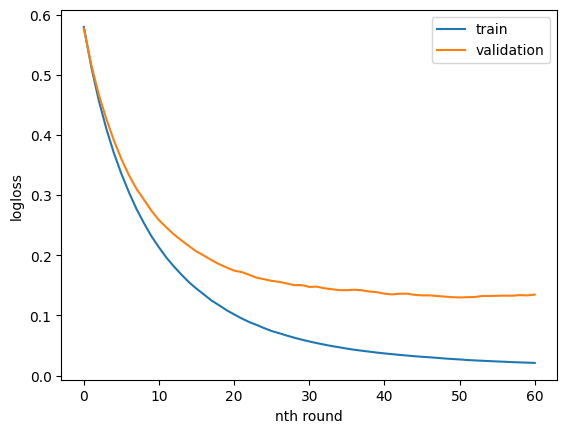

In [13]:
# 훈련 과정 시각화
import matplotlib.pyplot as plt

result = xgb_clf.evals_result()
train_loss = result['validation_0']['logloss']
val_loss = result['validation_1']['logloss']

plt.plot(train_loss, label='train')
plt.plot(val_loss, label='validation')
plt.legend()
plt.xlabel('nth round')
plt.ylabel('logloss')
plt.show()

In [14]:
xgb_clf.score(X_train, y_train), xgb_clf.score(X_test, y_test)

(0.9859154929577465, 0.965034965034965)

In [ ]:
# !pip install --upgrade scikit-learn
!pip install --upgrade ipython numpy scipy

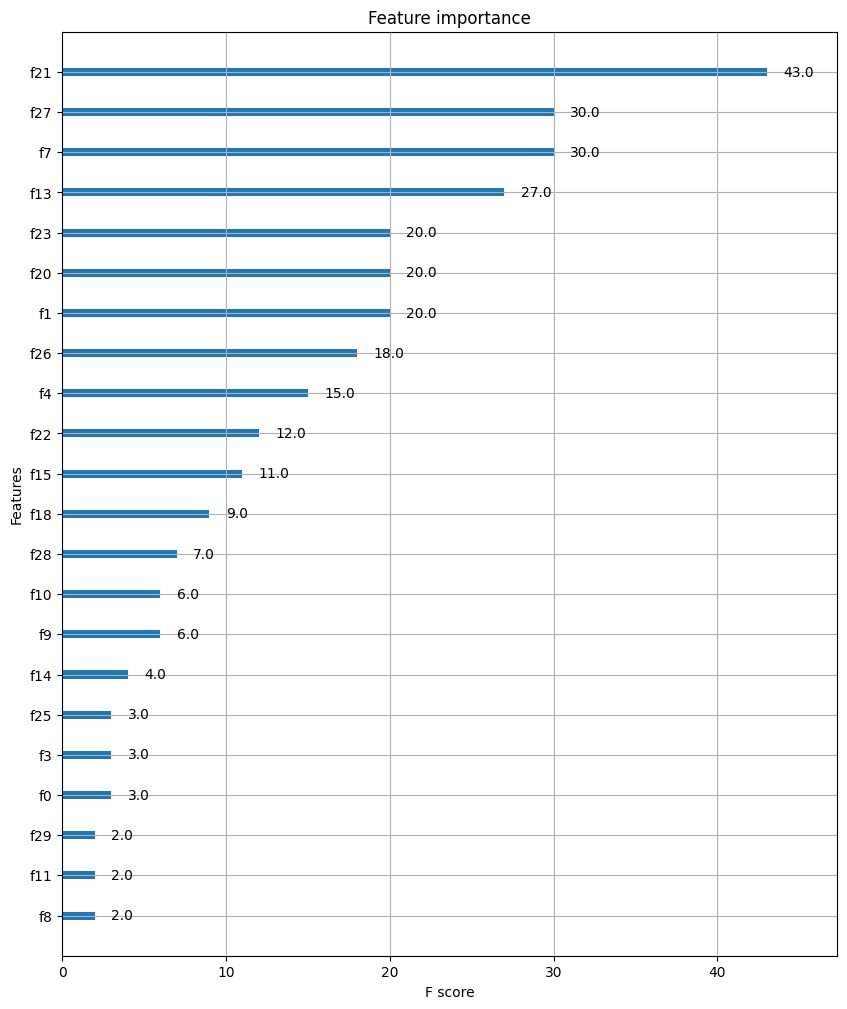

In [18]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_clf, ax=ax)
plt.show()

In [19]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 36.9 MB/s eta 0:00:00


In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

# 학습-테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0, test_size=0.2)

# 학습데이터 -> 학습-검증 데이터 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, random_state=0, test_size=0.1)

In [33]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators = 100,
    learning_rate = 0.7,
    early_stopping_rounds = 100,
    # min_child_samples =1,
    verbose=1
)

eval_set = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, eval_set=eval_set)


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[41]	training's binary_logloss: 5.07971e-06	valid_1's binary_logloss: 0.000761204


c:\Users\Playdata\AppData\Local\anaconda3\envs\sky_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LGBMClassifier(early_stopping_rounds=100, learning_rate=0.7, verbose=1)

In [34]:
lgbm.score(X_train, y_train), lgbm.score(X_test, y_test)

c:\Users\Playdata\AppData\Local\anaconda3\envs\sky_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Playdata\AppData\Local\anaconda3\envs\sky_env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(1.0, 1.0)